In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5728\3810907375.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')


In [3]:
sanbul = pd.read_csv('C:\project22\python\month_place_sanbul.csv', encoding = 'euc-kr')

sanbul.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

wether_2 = pd.read_csv('C:\project22\python\OBS_AWS_DD_20220714142558.csv', encoding = 'euc-kr')
wether_2.drop(['지점'], axis=1, inplace=True)

index_name = ['stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'sumRn', 'maxInsWs', 'maxInsWsHrmt', 'avgWs', 'maxInsWsWd']
wether_2.columns = index_name

C:\Users\user\AppData\Local\Temp\ipykernel_5728\2276106963.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')


In [5]:
wether_concat = pd.concat([wether, wether_2])

In [6]:
# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul['day_place'] = sanbul['tm'] + sanbul['발생장소_시군구']
wether_concat['day_place'] = wether_concat['tm'] + wether_concat['stnNm']

# 데이터 합치기
sanbul_wether = pd.merge(wether_concat, sanbul, on = 'day_place')

sanbul_wether.rename(columns = {'피해면적_합계' : 'damaged_area'}, inplace=True)

In [14]:
# 발생월, 시도 추출 = 03경북, 04강원, 03강원
sanbul_wether['month_count'] = str(sanbul_wether['발생일시_월']) + sanbul_wether['발생장소_시도']

# 기준년월과 지역 코드 합친 기준열 만들기
for i in range(len(sanbul_wether)):
    day = str(sanbul_wether.loc[i, '발생일시_월'])
    place = sanbul_wether.loc[i, '발생장소_시도']
    sanbul_wether.loc[i, 'month_count'] = day + place


condition = (sanbul_wether.month_count == '3경북') | (sanbul_wether.month_count == '4강원') | (sanbul_wether.month_count == '3강원')
sanbul_high = sanbul_wether[condition]

In [26]:
# sanbul_wether.groupby('mounth')
# sanbul_high.groupby('month_count').agg(["min", "mean", "std", "max"])
weather_g = sanbul_high.groupby('month_count').agg(["mean"])
count_g = sanbul_high.groupby('month_count').count()


C:\Users\user\AppData\Local\Temp\ipykernel_5728\3704310524.py:3: FutureWarning: ['stnNm', 'tm_x', 'iscs', 'day_place', '발생일시_시간', '발생일시_요일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구', '발생장소_읍면', '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', 'tm_y'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = sanbul_high.groupby('month_count').agg(["mean"])


In [30]:
weather_g

,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,...,발생일시_년,발생일시_월,발생일시_일,진화종료시간_년,진화종료시간_월,진화종료시간_일,damaged_area,rank,radio,cumulative
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
month_count,,,,,,,,,,,,,,,,,,,,,
3강원,6.940157,-0.668504,748.984252,15.174803,1456.677165,NaN,NaN,NaN,NaN,1.330000,...,2016.275591,3.0,16.944882,2016.275591,3.007874,16.755906,2.954803,667.834646,0.030653,98.446720
3경북,7.986842,-0.406140,828.912281,16.226316,1471.289474,NaN,NaN,NaN,NaN,1.633333,...,2016.947368,3.0,16.842105,2016.947368,3.000000,16.903509,1.723509,748.622807,0.017880,98.746290
4강원,13.673016,5.626190,781.809524,21.730952,1439.587302,0.511111,1447.5,1.116667,1413.25,2.205000,...,2016.674603,4.0,17.063492,2016.674603,4.000000,17.158730,13.681667,721.468254,0.141933,98.172381


In [36]:
count_g[['avgTa']]

,avgTa
month_count,
3강원,127
3경북,114
4강원,126


In [37]:
weather_final = weather_g.dropna()
sanbul_corr_mean = weather_final
sanbul_corr_mean

In [40]:
sanbul_corr_mean

,avgTa,"(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(mi10MaxRn, mean)","(mi10MaxRnHrmt, mean)","(hr1MaxRn, mean)","(hr1MaxRnHrmt, mean)",...,"(발생일시_년, mean)","(발생일시_월, mean)","(발생일시_일, mean)","(진화종료시간_년, mean)","(진화종료시간_월, mean)","(진화종료시간_일, mean)","(damaged_area, mean)","(rank, mean)","(radio, mean)","(cumulative, mean)"
month_count,,,,,,,,,,,,,,,,,,,,,
3강원,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3경북,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4강원,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
sanbul_corr_mean = sanbul_corr_mean.drop(['('발생일시_월', 'mean')', ])

Index([                   'avgTa',          ('avgTa', 'mean'),
                ('minTa', 'mean'),      ('minTaHrmt', 'mean'),
                ('maxTa', 'mean'),      ('maxTaHrmt', 'mean'),
            ('mi10MaxRn', 'mean'),  ('mi10MaxRnHrmt', 'mean'),
             ('hr1MaxRn', 'mean'),   ('hr1MaxRnHrmt', 'mean'),
             ('sumRnDur', 'mean'),          ('sumRn', 'mean'),
             ('maxInsWs', 'mean'),     ('maxInsWsWd', 'mean'),
         ('maxInsWsHrmt', 'mean'),          ('maxWs', 'mean'),
              ('maxWsWd', 'mean'),      ('maxWsHrmt', 'mean'),
                ('avgWs', 'mean'),     ('hr24SumRws', 'mean'),
                ('maxWd', 'mean'),          ('avgTd', 'mean'),
               ('minRhm', 'mean'),     ('minRhmHrmt', 'mean'),
               ('avgRhm', 'mean'),          ('avgPv', 'mean'),
                ('avgPa', 'mean'),          ('maxPs', 'mean'),
            ('maxPsHrmt', 'mean'),          ('minPs', 'mean'),
            ('minPsHrmt', 'mean'),          ('avgPs', '

In [29]:
count_g.isnull().count()

stnNm           3
tm_x            3
avgTa           3
minTa           3
minTaHrmt       3
               ..
damaged_area    3
tm_y            3
rank            3
radio           3
cumulative      3
Length: 84, dtype: int64

In [ ]:
sanbul_corr = sanbul_wether[['stnNm', 'tm_x','avgTa', 'minTa', 'maxTa', 'maxInsWs', 'maxInsWsWd', 
                              'maxWs', 'maxWsWd', 'hr24SumRws', 'avgTd', 'minRhm', 'avgRhm',
                              'avgPv', 'avgPa', 'sumSsHr', 'damaged_area']]

In [9]:
sanbul_corr = sanbul_wether[['stnNm', 'tm_x','avgTa', 'minTa', 'maxTa', 'maxInsWs', 'maxInsWsWd', 
                              'maxWs', 'maxWsWd', 'hr24SumRws', 'avgTd', 'minRhm', 'avgRhm',
                              'avgPv', 'avgPa', 'sumSsHr', 'damaged_area']]

In [10]:
# 상관분석
sanbul_corr.corr()

,avgTa,minTa,maxTa,maxInsWs,maxInsWsWd,maxWs,maxWsWd,hr24SumRws,avgTd,minRhm,avgRhm,avgPv,avgPa,sumSsHr,damaged_area
avgTa,1.000000,0.957900,0.968832,-0.081901,-0.183530,-0.073209,-0.219097,-0.030346,0.882703,0.165352,0.169056,0.821444,-0.332667,0.280132,0.006598
minTa,0.957900,1.000000,0.871806,-0.038326,-0.199887,-0.031685,-0.244307,0.060278,0.886192,0.297770,0.227098,0.861222,-0.260581,0.158388,0.008089
maxTa,0.968832,0.871806,1.000000,-0.150614,-0.165917,-0.137627,-0.189931,-0.140971,0.845900,0.060907,0.160872,0.759451,-0.371179,0.345095,-0.000957
maxInsWs,-0.081901,-0.038326,-0.150614,1.000000,0.203901,0.927873,0.201029,0.777803,-0.245385,-0.216613,-0.412816,-0.220749,-0.073694,0.104504,0.189563
maxInsWsWd,-0.183530,-0.199887,-0.165917,0.203901,1.000000,0.192548,0.690685,0.116923,-0.303289,-0.314907,-0.310145,-0.279131,-0.043674,0.117351,0.036291
maxWs,-0.073209,-0.031685,-0.137627,0.927873,0.192548,1.000000,0.178321,0.840418,-0.228713,-0.187564,-0.396058,-0.195583,-0.010982,0.118922,0.145814
maxWsWd,-0.219097,-0.244307,-0.189931,0.201029,0.690685,0.178321,1.000000,0.102411,-0.330244,-0.326855,-0.311256,-0.289617,-0.013102,0.075514,0.014121
hr24SumRws,-0.030346,0.060278,-0.140971,0.777803,0.116923,0.840418,0.102411,1.000000,-0.195890,-0.105888,-0.426316,-0.128011,0.098353,0.137129,0.128816
avgTd,0.882703,0.886192,0.845900,-0.245385,-0.303289,-0.228713,-0.330244,-0.195890,1.000000,0.527872,0.600526,0.939920,-0.308761,0.037903,-0.037525
minRhm,0.165352,0.297770,0.060907,-0.216613,-0.314907,-0.187564,-0.326855,-0.105888,0.527872,1.000000,0.802104,0.554770,0.046798,-0.447479,-0.041882


<AxesSubplot:>

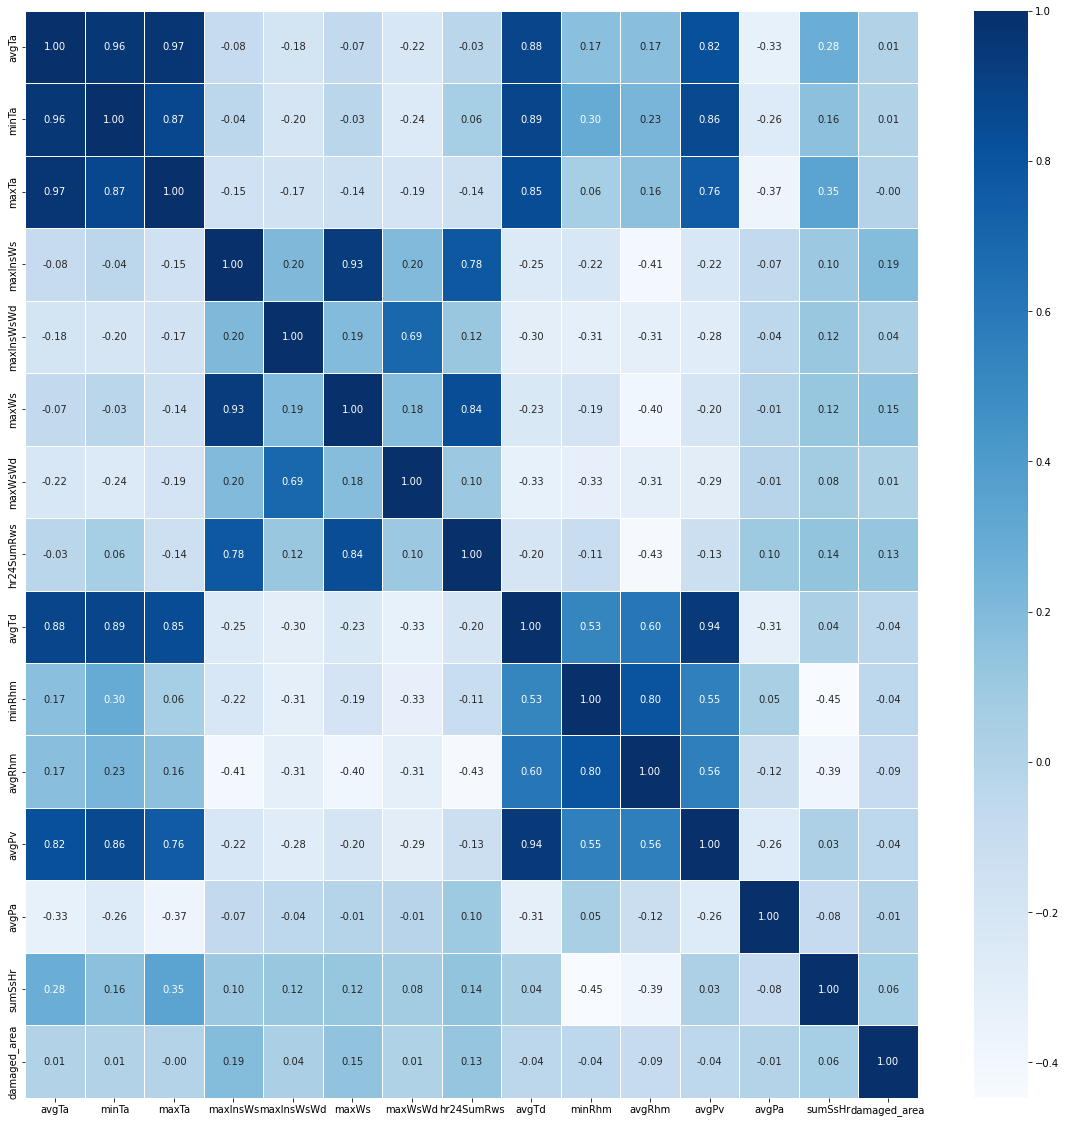

In [11]:
# 히트맵 그려보기
plt.figure(figsize=(20, 20))
sns.heatmap(data = sanbul_corr.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')